In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Recall,Precision
from tensorflow_addons.metrics import F1Score
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Input, Flatten
import os 
from os import listdir
from PIL import Image as PImage

from google.colab import drive
drive.mount('/content/gdrive')

np.random.seed(9001)
#WHAT!? 9000!?!?

Mounted at /content/gdrive


In [ ]:
pip install tensorflow_addons

In [ ]:
'''#K Fold Cross Validation
shuffle_ind=np.random.permutation(len(df))
i=1
while i<=k:
  k_end=int(len(df)*(i/k))
  k_start=int(len(df)*(i-1/k))
  k_fold=shuffle_ind[k_start:k_end]
  trainL=shuffle_ind[0:k_start]
  trainR=shuffle_ind[k_end:]
  train=np.concatenate(trainL,trainR)
  i+=1'''

'#K Fold Cross Validation\nshuffle_ind=np.random.permutation(len(df))\ni=1\nwhile i<=k:\n  k_end=int(len(df)*(i/k))\n  k_start=int(len(df)*(i-1/k))\n  k_fold=shuffle_ind[k_start:k_end]\n  trainL=shuffle_ind[0:k_start]\n  trainR=shuffle_ind[k_end:]\n  train=np.concatenate(trainL,trainR)\n  i+=1'

In [ ]:
'''base_dir='gdrive/My Drive/Colab Notebooks/CNN/INRIAPerson/Train
#tensor dataframes allow for a lazy load to the images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=9001,
  shuffle=True,
  #image_size=(img_height, img_width),
  batch_size=1
)'''

'base_dir=\'gdrive/My Drive/Colab Notebooks/CNN/INRIAPerson/Train\n#tensor dataframes allow for a lazy load to the images\ntrain_ds = tf.keras.preprocessing.image_dataset_from_directory(\n  base_dir,\n  validation_split=0.2,\n  subset="training",\n  seed=9001,\n  shuffle=True,\n  #image_size=(img_height, img_width),\n  batch_size=1\n)'

In [ ]:
'''val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=9001,
  shuffle=True,
  #image_size=(img_height, img_width),
  batch_size=1
)'''

'val_ds = tf.keras.preprocessing.image_dataset_from_directory(\n  base_dir,\n  validation_split=0.2,\n  subset="validation",\n  seed=9001,\n  shuffle=True,\n  #image_size=(img_height, img_width),\n  batch_size=1\n)'

In [ ]:
'''for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break'''

'for image_batch, labels_batch in train_ds:\n  print(image_batch.shape)\n  print(labels_batch.shape)\n  break'

Load All positive images for augmentation:

In [ ]:
# def loadImages(path):
#     # return array of images

#     imagesList = listdir(path)
#     loadedImages = []
#     for image in imagesList:
#         img = PImage.open(path + image)
#         loadedImages.append(img)

#     return loadedImages
# # your images in an array
# imgs = loadImages('gdrive/My Drive/Colab Notebooks/Human_Detection/INRIAPerson/Train/pos/')

In [ ]:
#Just Makes it lighter
'''def noise (image):
  noise = np.random.randint(0,150)
  newimgdata = []
  #hard code number of pixel values
  for color in image.getdata():
    newpix=[]
    for i in range(len(color)):
      if color[i]!=255:
        p =color[i] + noise
      newpix.append( p )
    newpix=tuple(newpix)
    newimgdata.append(newpix)
  newimg = PImage.new(img.mode,img.size)
  newimg.putdata(newimgdata)
  return newimg
noise(img)'''

'def noise (image):\n  noise = np.random.randint(0,150)\n  newimgdata = []\n  #hard code number of pixel values\n  for color in image.getdata():\n    newpix=[]\n    for i in range(len(color)):\n      if color[i]!=255:\n        p =color[i] + noise\n      newpix.append( p )\n    newpix=tuple(newpix)\n    newimgdata.append(newpix)\n  newimg = PImage.new(img.mode,img.size)\n  newimg.putdata(newimgdata)\n  return newimg\nnoise(img)'

Functon for adding noise to random pixel components throughout the image:

In [ ]:
# def noise (image):
#   noise = np.random.randint(0,150)
#   newimgdata = []
#   for color in image.getdata():
#     rand_ind = np.random.randint(0,len(color)-1)
#     newpix=[]
#     for i in range(len(color)):
#       if i==rand_ind:
#         if color[i]!=255:
#           p =color[i] + noise
#           newpix.append( p )
#         else:
#           newpix.append(color[i])
#       else:
#         newpix.append(color[i])
#     newpix=tuple(newpix)
#     newimgdata.append(newpix)
#   newimg = PImage.new(img.mode,img.size)
#   newimg.putdata(newimgdata,scale=1.0, offset=0.0)
#   return newimg

Augment positive images (horizontal flip, vertical flip, noise, and 90 degree rotation):

In [ ]:
'''aug_dir='/content/gdrive/MyDrive/Colab Notebooks/Human_Detection/INRIAPerson/TrainA/pos/'
i = 0
for img in imgs:
  hoz_flip = img.transpose(PImage.FLIP_LEFT_RIGHT)
  hoz_flip.save(aug_dir+f"{i}"+"hoz.png")
  ver_flip = img.transpose(PImage.FLIP_TOP_BOTTOM)
  ver_flip.save(aug_dir+f"{i}"+"vert.png")
  noisey=noise(img)
  noisey.save(aug_dir+f"{i}"+"noisey.png")
  rot=img.rotate(90)
  rot.save(aug_dir+f"{i}"+"rot.png")
  i+=1'''

'aug_dir=\'/content/gdrive/MyDrive/Colab Notebooks/Human_Detection/INRIAPerson/TrainA/pos/\'\ni = 0\nfor img in imgs:\n  hoz_flip = img.transpose(PImage.FLIP_LEFT_RIGHT)\n  hoz_flip.save(aug_dir+f"{i}"+"hoz.png")\n  ver_flip = img.transpose(PImage.FLIP_TOP_BOTTOM)\n  ver_flip.save(aug_dir+f"{i}"+"vert.png")\n  noisey=noise(img)\n  noisey.save(aug_dir+f"{i}"+"noisey.png")\n  rot=img.rotate(90)\n  rot.save(aug_dir+f"{i}"+"rot.png")\n  i+=1'

Load negative images:

In [ ]:
# # your images in an array
# imgs = loadImages('gdrive/My Drive/Colab Notebooks/Human_Detection/INRIAPerson/Train/neg/')

Augment negative:

In [ ]:
'''aug_dir='/content/gdrive/MyDrive/Colab Notebooks/Human_Detection/INRIAPerson/TrainA/neg/'
i = 0
for img in imgs:
  hoz_flip = img.transpose(PImage.FLIP_LEFT_RIGHT)
  hoz_flip.save(aug_dir+f"{i}"+"hoz.png")
  ver_flip = img.transpose(PImage.FLIP_TOP_BOTTOM)
  ver_flip.save(aug_dir+f"{i}"+"vert.png")
  noisey=noise(img)
  noisey.save(aug_dir+f"{i}"+"noisey.png")
  rot=img.rotate(90)
  rot.save(aug_dir+f"{i}"+"rot.png")
  i+=1'''

'aug_dir=\'/content/gdrive/MyDrive/Colab Notebooks/Human_Detection/INRIAPerson/TrainA/neg/\'\ni = 0\nfor img in imgs:\n  hoz_flip = img.transpose(PImage.FLIP_LEFT_RIGHT)\n  hoz_flip.save(aug_dir+f"{i}"+"hoz.png")\n  ver_flip = img.transpose(PImage.FLIP_TOP_BOTTOM)\n  ver_flip.save(aug_dir+f"{i}"+"vert.png")\n  noisey=noise(img)\n  noisey.save(aug_dir+f"{i}"+"noisey.png")\n  rot=img.rotate(90)\n  rot.save(aug_dir+f"{i}"+"rot.png")\n  i+=1'

In [ ]:
# def combine_generator(gen1, gen2):
#     while True:
#         yield(next(gen1), next(gen2))

In [ ]:
base_dir='gdrive/My Drive/Colab Notebooks/Human_Detection/INRIAPerson/Train'
#Rescaling
train_datagen=ImageDataGenerator(rescale=1./255, validation_split=.2, dtype=tf.uint8)
val_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='training'
)
val_generator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='validation'
)

Found 1467 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [ ]:
# base_dir='gdrive/My Drive/Colab Notebooks/Human_Detection/INRIAPerson/TrainA'
# #Rescaling
# train_datagen=ImageDataGenerator(rescale=1./255, dtype=tf.uint8)
# train_generator=train_datagen.flow_from_directory(
#     base_dir,
#     target_size=(224,224),
#     batch_size=32,
#     shuffle=True,
#     class_mode='binary',
# )

In [ ]:
# base_dir='gdrive/My Drive/Colab Notebooks/Human_Detection/INRIAPerson/Augmented_Train/Positive'
# #Rescaling
# augPos_datagen=ImageDataGenerator(rescale=1./255, dtype=tf.uint8)
# train_generator=train_datagen.flow_from_directory(
#     base_dir,
#     target_size=(224,224),
#     batch_size=32,
#     shuffle=True,
#     class_mode='binary',
# )

In [ ]:
# base_dir='gdrive/My Drive/Colab Notebooks/Human_Detection/INRIAPerson/Augmented_Train/Negative'
# #Rescaling
# augNeg_datagen=ImageDataGenerator(rescale=1./255, validation_split=.5, dtype=tf.uint8)
# train_generator=train_datagen.flow_from_directory(
#     base_dir,
#     target_size=(224,224),
#     batch_size=32,
#     shuffle=True,
#     class_mode='binary',
#     subset='training'
# )

In [ ]:
base_dir='gdrive/My Drive/Colab Notebooks/Human_Detection/INRIAPerson/Test'
#Rescaling
test_datagen=ImageDataGenerator(rescale=1./255, dtype=tf.uint8)
test_generator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=741,
    shuffle=True,
    class_mode='binary',
)

Found 741 images belonging to 2 classes.


In [ ]:
mobilenet_v2 = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,
                                                              input_shape=(224, 224, 3),
                                                              weights="imagenet",
                                                              )

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
mobilenet_v2.trainable = False

In [ ]:
model = tf.keras.Sequential([
    Input((224, 224, 3)),
    mobilenet_v2,
    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer='Adam',loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',F1Score(num_classes=1),Precision(),Recall()])

In [ ]:
history=model.fit(train_generator, validation_data=val_generator,epochs=5)

Epoch 1/5
46/46 [==============================] - ETA: 0s - loss: 0.1693 - accuracy: 0.9850 - f1_score: 0.8319 - precision: 0.9757 - recall: 0.9797

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


46/46 [==============================] - 272s 6s/step - loss: 0.1693 - accuracy: 0.9850 - f1_score: 0.8319 - precision: 0.9757 - recall: 0.9797 - val_loss: 0.1319 - val_accuracy: 0.9973 - val_f1_score: 0.9878 - val_precision: 1.0000 - val_recall: 0.9918
Epoch 2/5
46/46 [==============================] - 51s 1s/step - loss: 0.0974 - accuracy: 0.9864 - f1_score: 0.9101 - precision: 0.9777 - recall: 0.9817 - val_loss: 0.2488 - val_accuracy: 0.9945 - val_f1_score: 0.9959 - val_precision: 1.0000 - val_recall: 0.9836
Epoch 3/5
46/46 [==============================] - 51s 1s/step - loss: 0.1172 - accuracy: 0.9939 - f1_score: 0.9553 - precision: 0.9899 - recall: 0.9919 - val_loss: 0.1896 - val_accuracy: 0.9945 - val_f1_score: 0.9959 - val_precision: 1.0000 - val_recall: 0.9836
Epoch 4/5
46/46 [==============================] - 50s 1s/step - loss: 0.1798 - accuracy: 0.9864 - f1_score: 0.9514 - precision: 0.9797 - recall: 0.9797 - val_loss: 0.1770 - val_accuracy: 0.9973 - val_f1_score: 0.9918 - 

In [ ]:
model.evaluate(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


1/1 [==============================] - 31s 31s/step - loss: 0.9725 - accuracy: 0.9663 - f1_score: 0.9637 - precision: 0.9925 - recall: 0.9201


[0.9725031852722168,
 0.9662618041038513,
 array([0.9637306], dtype=float32),
 0.9925093650817871,
 0.9201388955116272]

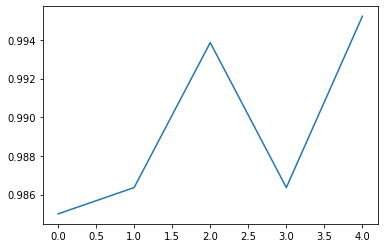

In [ ]:
xs = range(len(history.history["accuracy"]))
plt.plot(xs, history.history["accuracy"])

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
prediction=model.predict(test_generator).flatten()
# prediction = tf.nn.sigmoid(prediction)
prediction.shape

In [ ]:
np.mean(tf.where(prediction < 0.5, 0, 1) == y)

In [ ]:
preds = np.squeeze(tf.where(prediction >= 0.5, 1, 0))

In [ ]:
np.mean(preds == y)

In [ ]:
f1_score(test_datagen, prediction, average='macro')

In [ ]:
imgs, labels = next(iter(test_generator))
labels.shape

In [ ]:
y.shape, prediction.shape

In [ ]:
x, y = next(test_generator)

In [ ]:
y.shape

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
preds = np.argmax(prediction, axis=1)
preds

In [ ]:
#f1_score(prediction, y)

In [ ]:
model.evaluate()

In [ ]:
np.squeeze(prediction)

In [ ]:
y

In [ ]:
img = PImage.open('gdrive/My Drive/Colab Notebooks/Human_Detection/image_2021_06_01T16_11_06_870Z.png')

In [ ]:
img = np.array(img)
img = np.resize(img, (224, 224, 3))
img = img.reshape(1, 224, 224, 3)

In [ ]:
prediction=model.predict(img)

In [ ]:
tf.where(prediction < 0.5, 0, 1)